<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/RO/cvicenia/notebooky/cv06_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 - Linear Classifier, SVM

In this lab we will cover the linear classifier as well as the SVM classifier. We will first implement a linear classifier using our own loss function and then we will utilize existing libraries.

## Synthetic data

In this lab we will work with some synthetic data. We will first start with simple data of two classes each from a distinct normal distribution in 2D space.

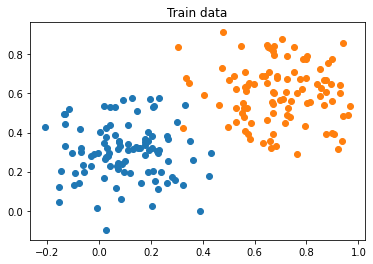

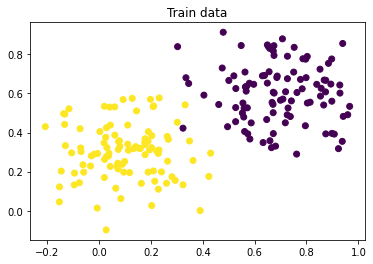

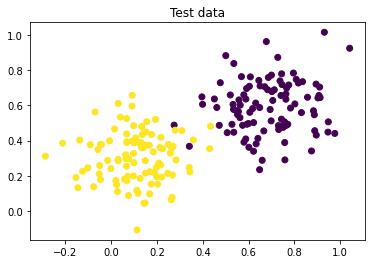

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(11)

x1_center = np.array([0.1, 0.3])
x1 =  x1_center + 0.15 * np.random.randn(100, 2)

x2_center = np.array([0.7, 0.6])
x2 =  x2_center + 0.15 * np.random.randn(100, 2)

# when the data is separated by classes it is easy to plot
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.title("Train data")
plt.show()

# we try to get a vector of classies and a matrix of all feature vectors
y = np.ones(200)
y[100:] = -1
x = np.concatenate([x1, x2], axis=0)

# now we will shuffle the data
pindxs = np.random.permutation(200)
x = x[pindxs]
y = y[pindxs]

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Train data")
plt.show()

# we will also generate synthetic data as a test set using the same distributions
x1_test = x1_center + 0.15 * np.random.randn(100, 2)
x2_test =  x2_center + 0.15 * np.random.randn(100, 2)
y_test = np.ones(200)
y_test[100:] = -1
x_test = np.concatenate([x1_test, x2_test], axis=0)
pindxs = np.random.permutation(200)
x_test = x_test[pindxs]
y_test = y_test[pindxs]

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.title("Test data")
plt.show()

## Scikit-learn Classifiers



Now we will use the classifiers from the scikit-learn library. Before doing that we will create a function which helps us to show the decision boundary of a classifier.

In [ ]:
def plot_clf_boundary(clf, x, y): 
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  h_x = (x_max - x_min) / 150
  h_y = (y_max - y_min) / 150
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  # plt.xticks(())
  # plt.yticks(())
  plt.show()

Now we can use a simple linear classifier `sklearn.linear_model.LogisticRegression`. You can check out its documentation for more info.

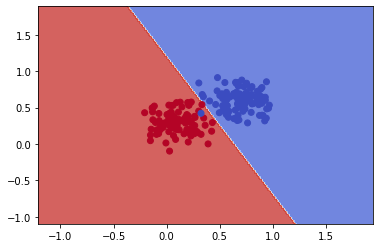

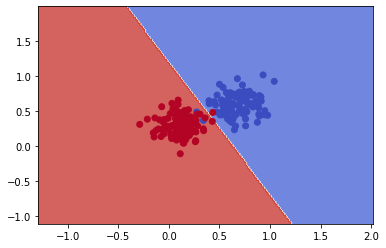

In [ ]:
from sklearn.linear_model import LogisticRegression

linear = LogisticRegression()
linear.fit(x, y)

plot_clf_boundary(linear, x, y)
plot_clf_boundary(linear, x_test, y_test)

### Exercise - Calculating accuracy on the training set and the test set

Your task will now be to calculate the accuracy on the test data and also on training data. For this purpose you should check out the method `predict` of the classifier object.

In [ ]:
y_pred = linear.predict(x)
y_test_pred = linear.predict(x_test)

print("Accuracy on train data: ", np.mean(y_pred == y))
print("Accuracy on test data: ", np.mean(y_test_pred == y_test))

Accuracy on train data:  0.995
Accuracy on test data:  0.985


### Exercise - SVM

We can find the SVM in scikit-learn as `sklearn.svm.SVC`. Check its documentation and use it. Try change the kernel to emulate the decision boundaries as shown below.

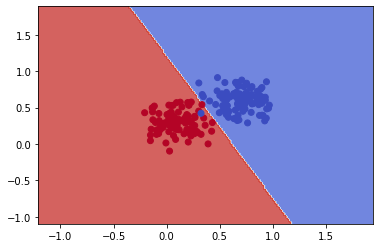

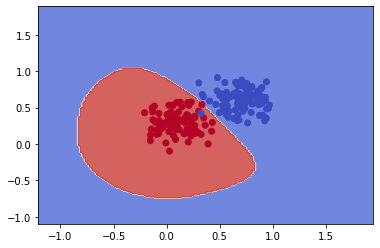

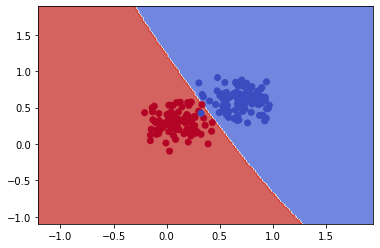

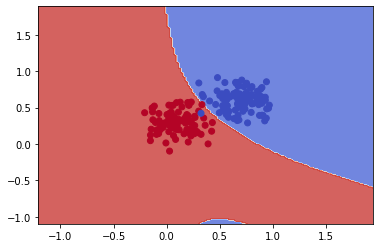

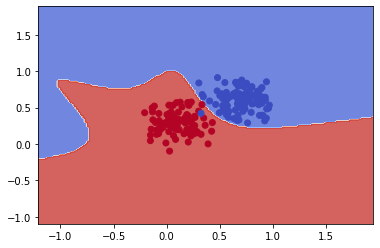

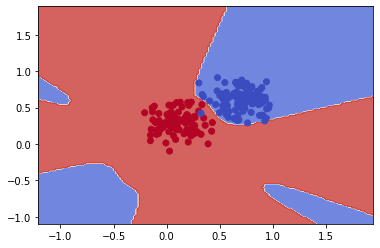

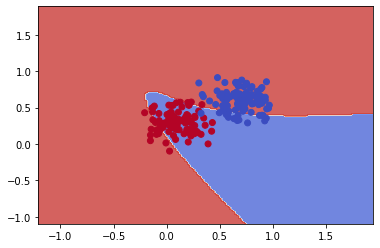

In [ ]:
from sklearn.svm import SVC

linear = SVC(kernel='linear')
linear.fit(x, y)
plot_clf_boundary(linear, x, y)


rbf = SVC(kernel='rbf')
rbf.fit(x, y)
plot_clf_boundary(rbf, x, y)


rbf_auto = SVC(kernel='rbf', gamma='auto')
rbf_auto.fit(x, y)
plot_clf_boundary(rbf_auto, x, y)


poly_3 = SVC(kernel='poly')
poly_3.fit(x, y)
plot_clf_boundary(poly_3, x, y)


poly_5 = SVC(kernel='poly', degree=5)
poly_5.fit(x, y)
plot_clf_boundary(poly_5, x, y)


poly_10 = SVC(kernel='poly', degree=8)
poly_10.fit(x, y)
plot_clf_boundary(poly_10, x, y)


svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(x, y)
plot_clf_boundary(svm_sigmoid, x, y)

### Exercise - Displaying the support vectors

By checking the documentation try to diplay the support vectors for a given classifier. In order to extract the information about the support vectors consult the documentation

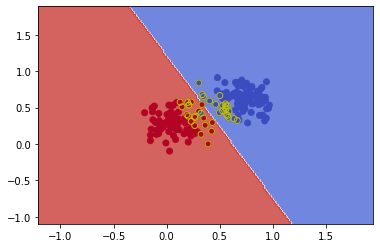

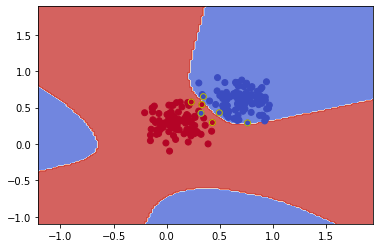

In [ ]:
def plot_clf_boundary_with_support_vectors(clf, x, y):
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  h_x = (x_max - x_min) / 150
  h_y = (y_max - y_min) / 150
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none', edgecolors='y')
  # plt.xticks(())
  # plt.yticks(())
  plt.show()


linear = SVC(kernel='linear')
linear.fit(x, y)
plot_clf_boundary_with_support_vectors(linear, x, y)

poly_7 = SVC(kernel='poly', degree=7)
poly_7.fit(x, y)
plot_clf_boundary_with_support_vectors(poly_7, x, y)

We will now generate a spiral dataset using code from [this gist](https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5).

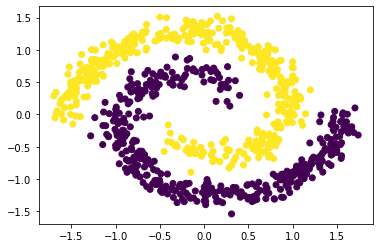

In [ ]:
from numpy import pi

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi
r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

x_spiral = 0.1 * res[:, :2]
y_spiral = res[:, 2].astype(np.int64)

plt.scatter(x_spiral[:, 0], x_spiral[:, 1], c=y_spiral)
plt.show()

### Exercise - Spiral Data

Try to find a good classifier for the spiral data.

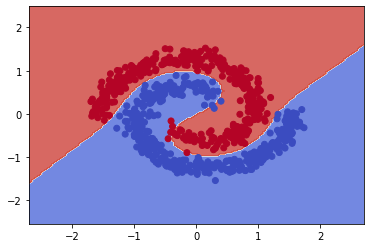

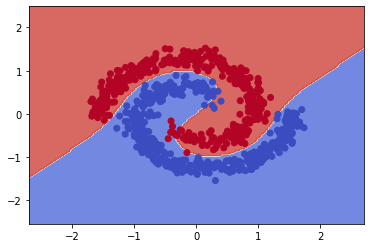

In [ ]:
rbf = SVC(kernel='rbf')
rbf.fit(x_spiral, y_spiral)
plot_clf_boundary(rbf, x_spiral, y_spiral)


rbf_auto = SVC(kernel='rbf', gamma='auto')
rbf_auto.fit(x_spiral, y_spiral)
plot_clf_boundary(rbf_auto, x_spiral, y_spiral)

## Custom implementation of a Linear Classifier

The core principle of a linear classifier is a linear function $f : \mathbb{R}^n \mapsto \mathbb{R}, f(\vec{x}) = \vec{w}^T \vec{x} + b$, where $\vec{x}$ is the feature vector, $\vec{w}$ is the weight vector a $b$ is the bias term. If we have two classes $\omega_1$ a $\omega_2$, then we add the feature vector $\vec{x}$ to the class $\omega_1$ if $f(\vec{x}) \ge 0$, and to class $\omega_2$ if $f(\vec{x}) < 0$. The function $f$ divides the feature space into two areas divided by a hyperplane. Points where $f(\vec{x}) = 0$ lie exactly on this hyperplane. 

To train the classifier we want to find the parameters of the classifier so that the hyperplane separates the training set the best.

We will work with some synthetic data where the individual classes are represented as two separate normal distributions.

### Exercise - Prediction

We will first implement a function which takes in a feature vector and predicts the resulting class.

The function will return the class from $\{-1, 1\}$. We will use the definition of standard classifier $f(\vec{x}) = \vec{w}^T \vec{x} + b$. The prediction function should also return the class which can be simply done by applying signum: $\text{sgn}(f(\vec{x}))$.

Your task is now to implement the function predict which takes the vector $\vec{x}$ on its input and outputs the predicted class.

To verify the results we can use the the following code to display the classifier.

In [ ]:
def display_binary_cls(x, y, w, b):
  if x.shape[1] != 2:
    raise TypeError("x has to represent 2-d points of shape (n, 2)")
  if y.shape[0] != x.shape[0]:
    raise TypeError("x and y have to have same number of rows")      
  if w.shape[0] != 2:
    raise TypeError("w has to be an array of shape (2,) ")

  xmin = np.min(x[:, 0])
  xmax = np.max(x[:, 0])
  ymin = np.min(x[:, 1])
  ymax = np.max(x[:, 1])

  plt.xlim(xmin=xmin - 0.1, xmax=xmax + 0.1)
  plt.ylim(ymin=ymin - 0.1, ymax=ymax + 0.1)


  if w[1] == 0.0:
    plt.plot([-b / w[0], -b / w[0]], [ymin, ymax], c='black')
  else:

    ymin = (- w[0] * xmin - b) / w[1]
    ymax = (- w[0] * xmax - b) / w[1]

    plt.plot([xmin, xmax], [ymin, ymax], c='black')

  plt.scatter(x[:, 0], x[:, 1], c=y)
  plt.show()

Implement the function `predict_linear` which will take on input a matrix `x` of shape $m \times n$ where $m$ is the number of feature vectors and $n$ is the dimension of the feature vectors (e.g. each row of the matrix is one feature vector), the weights vector `w` and the bias parameter `b` and returs a vector of length $m$ with the predicted classes.


In [ ]:
def predict_linear(x, w, b):
  y = np.where(np.dot(x, w) + b > 0, 1, -1)
  return y

You can test the code on randomly guessed parameters and see if the classes are separated by the give line as plotted in the output.

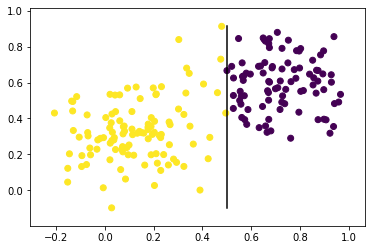

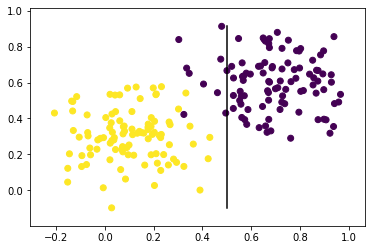

Accuracy of classifier:  0.955


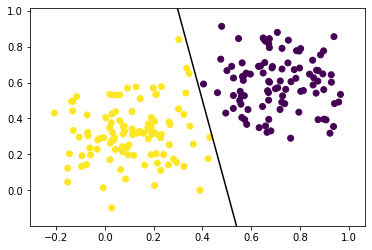

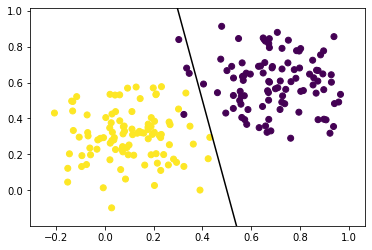

Accuracy of classifier:  0.98


In [ ]:
w = np.array([-1.0,0.0])
b = 0.5

y_pred = predict_linear(x, w, b)
display_binary_cls(x, y_pred, w, b)
display_binary_cls(x, y, w, b)

acc = np.sum(y_pred == y)/len(y)
print("Accuracy of classifier: ", acc)



w = np.array([-1.0, -0.2])
b = 0.5

y_pred = predict_linear(x, w, b)
display_binary_cls(x, y_pred, w, b)
display_binary_cls(x, y, w, b)

acc = np.sum(y_pred == y)/len(y)
print("Accuracy of classifier: ", acc)

### Exercise  - Training

The guessed parameters work fine, but usually we want to determine them automatically (in other words we want the machine to learn - hence machine learning). We wil convert this problem to the standard optimization task. We will try to find parameters $\vec{w}$ and $b$, such that they minimize a function $L(\vec{w}, b, X, Y)$, where $X = (\vec{x}_1, \vec{x}_2,~...~\vec{x}_m)$ represents the input data and a $Y = (y_1, y_2,~...,~y_m)$ the labeled classes.

$L$ is also called a loss function. Today we will use the Hinge Loss:

$$L(\vec{w}, b, X, Y) = \frac{1}{m} \sum_{i = 1}^m \text{max}\left(0, 1 - y_i \left(\vec{w}^T \vec{x}_i + b\right)\right)$$

To find the optimal parameters we will use gradient descent. It relies on iterative calculation of the parameters $\vec{w}$ and $b$ using the gradient.The iteration begins with a guesss and then we iterate:

$$b^{n + 1} = b^n - \eta \frac{\partial L}{\partial b}(\vec{w}^n, b^n, X, Y)$$

$$w_j^{n + 1} = w_j^n - \eta \frac{\partial L}{\partial w_j}(\vec{w}^n, b^n, X, Y)$$,

where $\eta$ is the step size. To do this we need to calculate the gradients:

$$\frac{\partial L}{\partial b}(\vec{w}_j^n, b^n, X, Y) = \frac{1}{m} \sum_{i = 1}^m -z_i^n y_i$$,
$$\frac{\partial L}{\partial w_j}(\vec{w}_j^n, b^n, X, Y) = \frac{1}{m} \sum_{i = 1}^m -z_i^n y_i x_{i, j} $$,

where $x_{i, j}$ is the $j$-th element of the $i$-th vector from the training set X and

$$z_i^n = \begin{cases} 1,~if~\left(\vec{w}^{nT} \vec{x}_i + b\right) y_i < 1 \\ 0,~otherwise \end{cases}$$

Implement the function `train_linear_cls(x, y, w_init, b_init, eta, n)` which takes $X, Y, \vec{w}^0, b^0$ and $\eta$ on input as well as the number of iterations $n$. On output it returns $\vec{w}^n$ a $b^n$. At every 100th step it should print out the value of the loss function.

### Bonus

As a bonus you can try to calculate the gradient if we add a regularization term to the loss function:

$$L(\vec{w}, b, X, Y) = \frac{1}{m} \sum_{i = 1}^m \text{max}\left(0, 1 - y_i \left(\vec{w}^T \vec{x}_i + b\right)\right) + \lambda \sum_{i=1}^2 w_i^2$$

The parameter $\lambda$ will then be added as another argument of the `train_linear_cls` function.

In [ ]:
def train_binary_cls(x, y, w, b, eps, n):
  m = len(y)
  for i in range(n):
    if i % 100 == 0:      
      loss = np.mean(np.clip(1 - (np.sum(w[np.newaxis, :] * x, axis=-1) + b) * y, 0.0, np.inf))  
      print("At step {} loss: {}".format(i, loss))

    z = np.where((np.dot(x, w) + b) * y < 1, 1, 0)
    b -= eps/m * np.sum(-z * y)
    w[0] -= eps/m * np.sum(-z * y * x[:, 0])    
    w[1] -= eps/m * np.sum(-z * y * x[:, 1])

  return w, b

We can test the code.

At step 0 loss: 1.074400979741701
At step 100 loss: 0.9768745668938247
At step 200 loss: 0.9183557493079431
At step 300 loss: 0.8630225347711392
At step 400 loss: 0.8088860971227231
At step 500 loss: 0.7553136587807119
At step 600 loss: 0.7018070466989224
At step 700 loss: 0.6485332647474178
At step 800 loss: 0.5952815772030314
At step 900 loss: 0.5420299267751758
At step 1000 loss: 0.48882695163693013
At step 1100 loss: 0.43566609553502905
At step 1200 loss: 0.384110452457046
At step 1300 loss: 0.34016929750627267
At step 1400 loss: 0.3065643989055752
At step 1500 loss: 0.27957765237568477
At step 1600 loss: 0.25558231180574736
At step 1700 loss: 0.23453370102083898
At step 1800 loss: 0.21914966101029898
At step 1900 loss: 0.2069879094493008
At step 2000 loss: 0.1963507697301243
At step 2100 loss: 0.18754689022912277
At step 2200 loss: 0.18018877971660935
At step 2300 loss: 0.17361939535698034
At step 2400 loss: 0.16767605226831953
At step 2500 loss: 0.16192966186048682
At step 2600 l

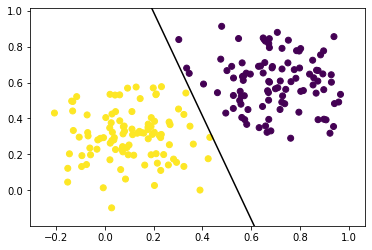

Accuracy of classifier on training data:  0.995


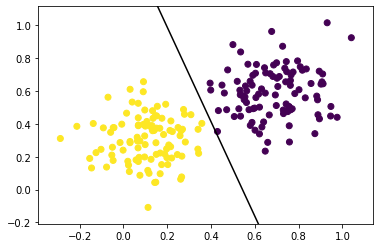

Accuracy of classifier on test data data:  0.98


In [ ]:
w_train, b_train = train_binary_cls(x, y, np.array([0.0, 0.5]), -1.0, 1e-2, 5000)
print(w_train, b_train)

y_pred = predict_linear(x, w_train, b_train)
display_binary_cls(x, y_pred, w_train, b_train)
acc = np.sum(y_pred == y)/len(y)
print("Accuracy of classifier on training data: ", acc)


y_pred_test = predict_linear(x_test, w_train, b_train)
display_binary_cls(x_test, y_pred_test, w_train, b_train)
acc_test = np.sum(y_pred_test == y_test)/len(y)
print("Accuracy of classifier on test data data: ", acc_test)